In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor as xgb 
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
file_train = "/Users/ishashah/Documents/python/Housing Dataset/train.csv"
file_test = "/Users/ishashah/Documents/python/Housing Dataset/test.csv"

In [3]:
df_test = pd.read_csv(file_test)
#df_test.head()
df_train = pd.read_csv(file_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# size of the database
print("size of training dataset : ", df_train.shape)
print("size of test dataset : ",df_test.shape)

size of training dataset :  (1460, 81)
size of test dataset :  (1459, 80)


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test_id = df_test[['Id']] # store id data n separate single column data frame 

1) Find missing columns
2) Remove missing columns which is more than 20% data missing
3) replace categorical with the mode strategy if the value is used more than 50% 
4) plot barplot for each categorical feature - remove the ones which is not required
4) Replace numberical with -1 and categorical with unknown - plot histogram for numerical
5) Feature Engeering - look at the correlation
6) Filter out highest correlated variables
7) Look at the target variable using histogram - there is skewness - perform standardization(log transformation)
8) apply models


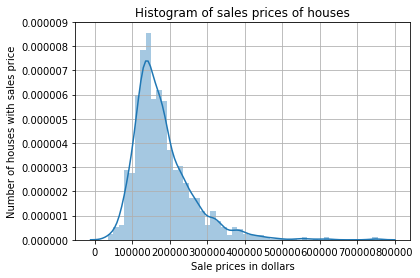

In [7]:
plt.figure(1)
sns.distplot(df_train['SalePrice'], 50)
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of houses")
plt.grid(True) 
plt.show()

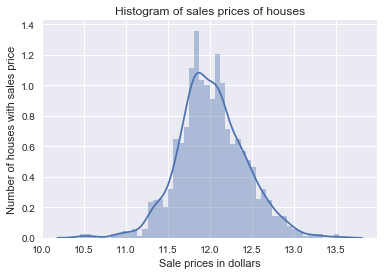

In [10]:
plt.figure(1)
sns.distplot(np.log(df_train['SalePrice']), 50)
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of houses")
plt.grid(True) 
plt.show()

Text(0.5,1,'Sale Price vs Year Built')

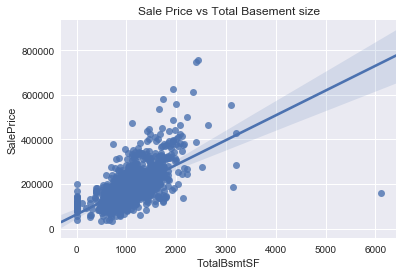

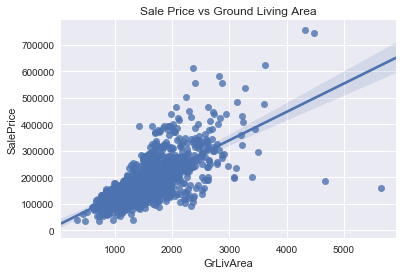

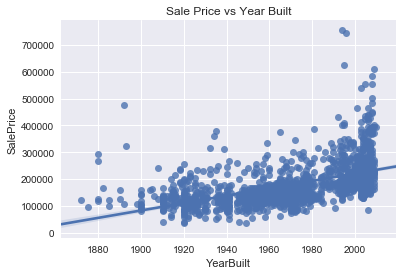

In [12]:
plt.figure(1)
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=df_train)
plt.title('Sale Price vs Total Basement size')
plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=df_train)
plt.title('Sale Price vs Ground Living Area')
plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="YearBuilt", y="SalePrice", data=df_train)
plt.title('Sale Price vs Year Built')

In [161]:
# find the missing values
missing_train = df_train.isnull().sum()

In [162]:
#find the missing values in test
missing_test = df_test.isnull().sum()

Anything with more than 15% of missing values will be removed

In [163]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [164]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [165]:
# since both training and testing dataset has almost same fields having null values
# remove the missing value columns if the null values are high
# treat other columns which have some null values
train_mask = (missing_train)/1460 > 0.15
missing_train[train_mask].index
missing_list = ['Id','LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature']
df_train = df_train.drop(missing_list, axis = 1)
df_test = df_test.drop(missing_list, axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d70d470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1232cd9e8>]], dtype=object)

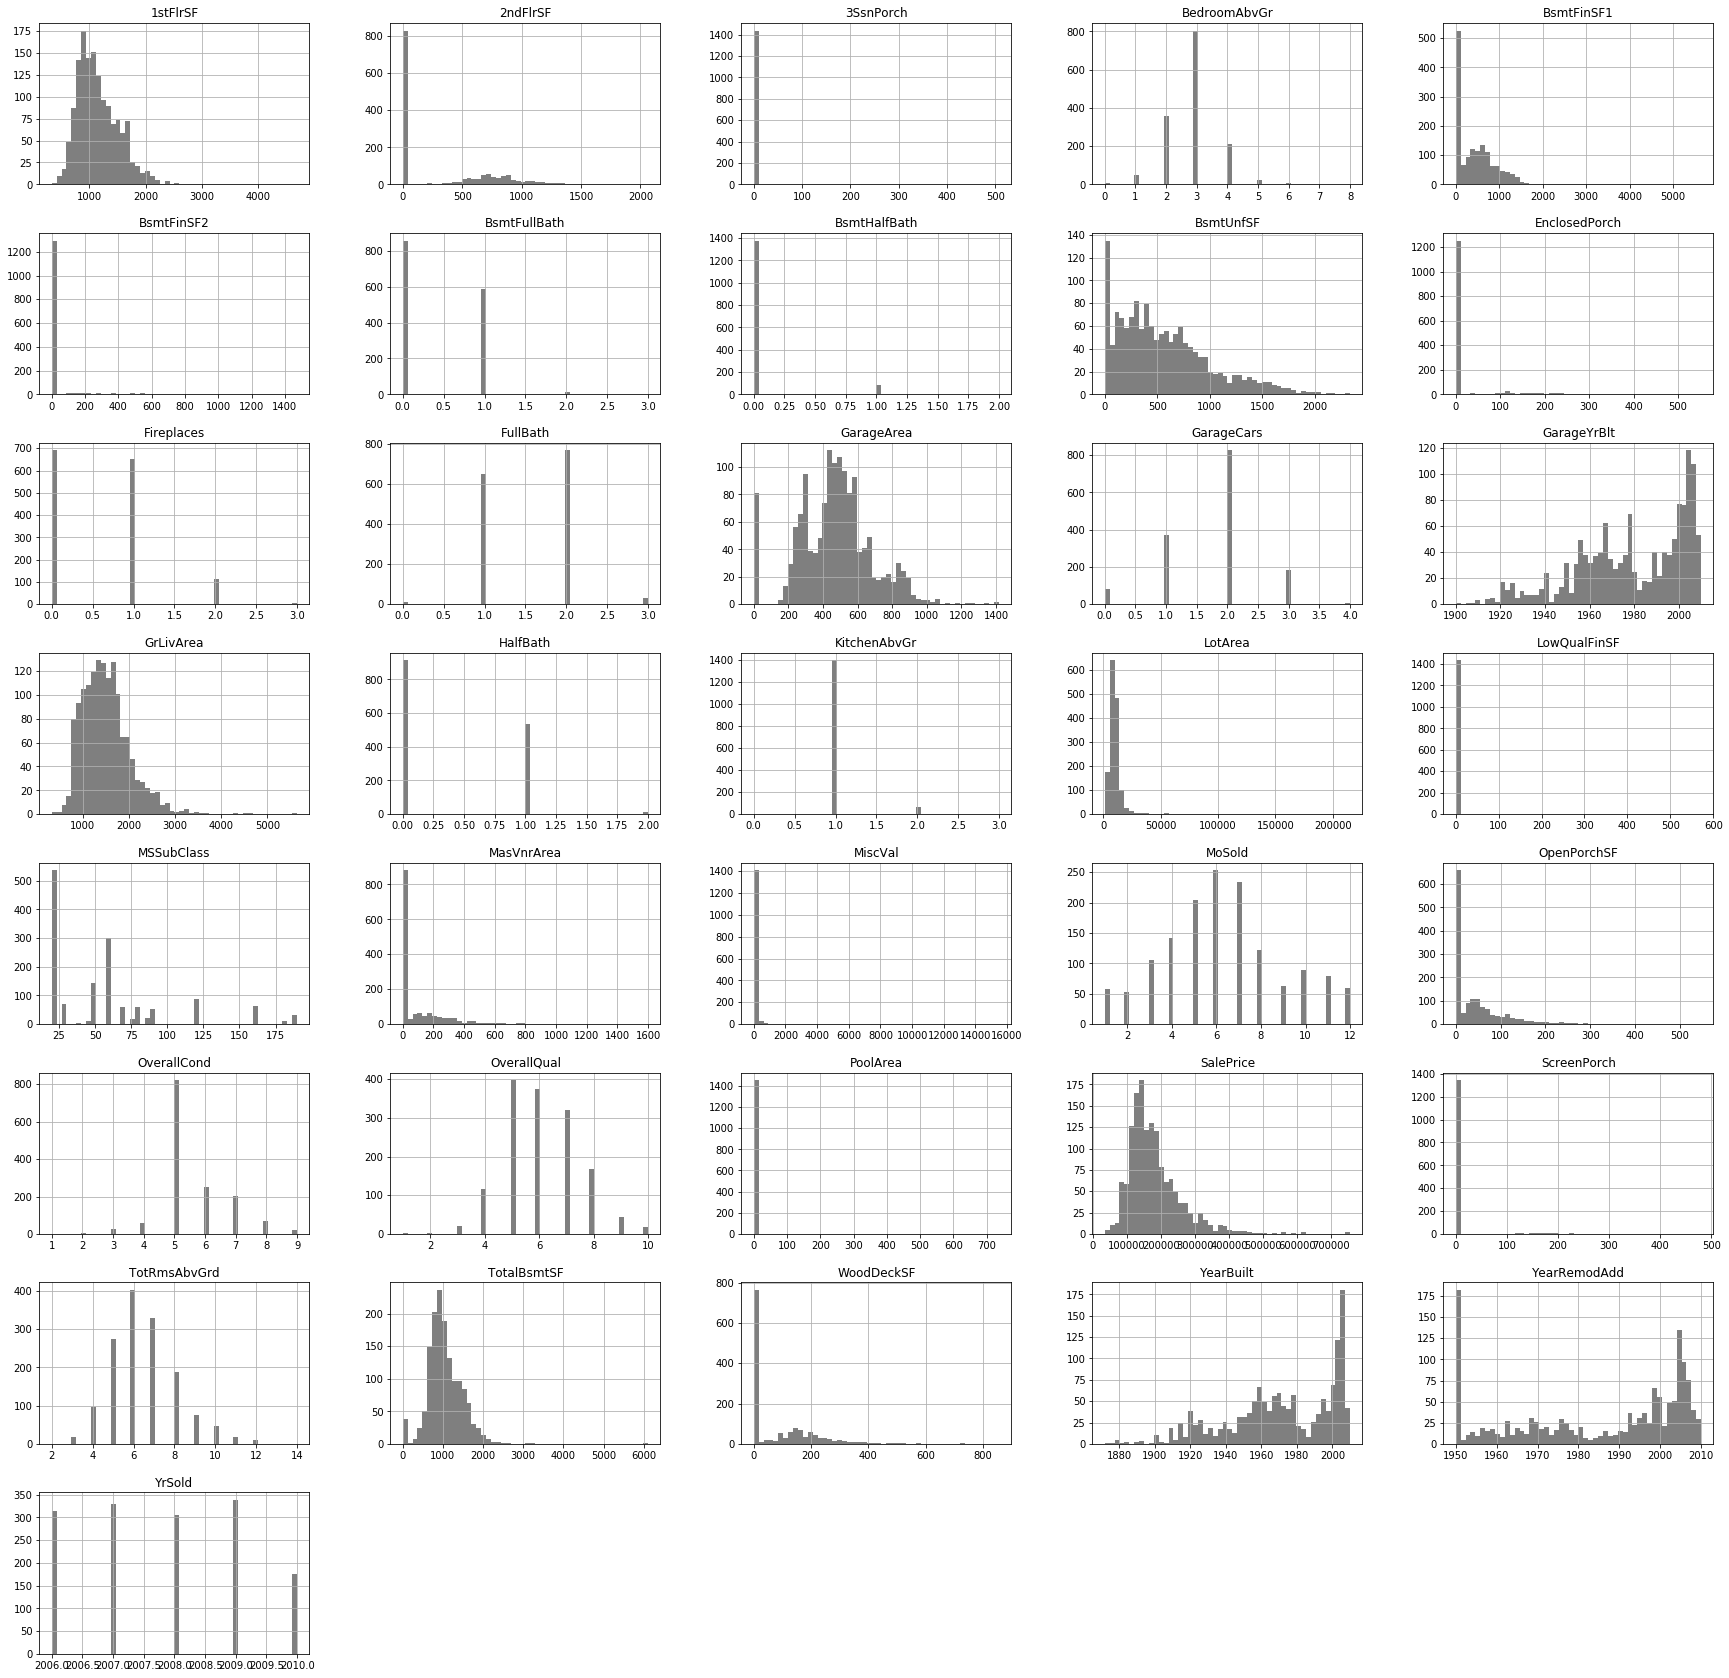

In [166]:
# plot histogram

plt.figure()
df_train.hist(layout = (8,5), color = 'k', alpha=0.5, bins=50, figsize = (30,30))

In [167]:
# removing features which has no variance
missing_list1 = ['3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch', 'WoodDeckSF']
df_train = df_train.drop(missing_list1, axis=1)
df_test = df_test.drop(missing_list1, axis = 1)


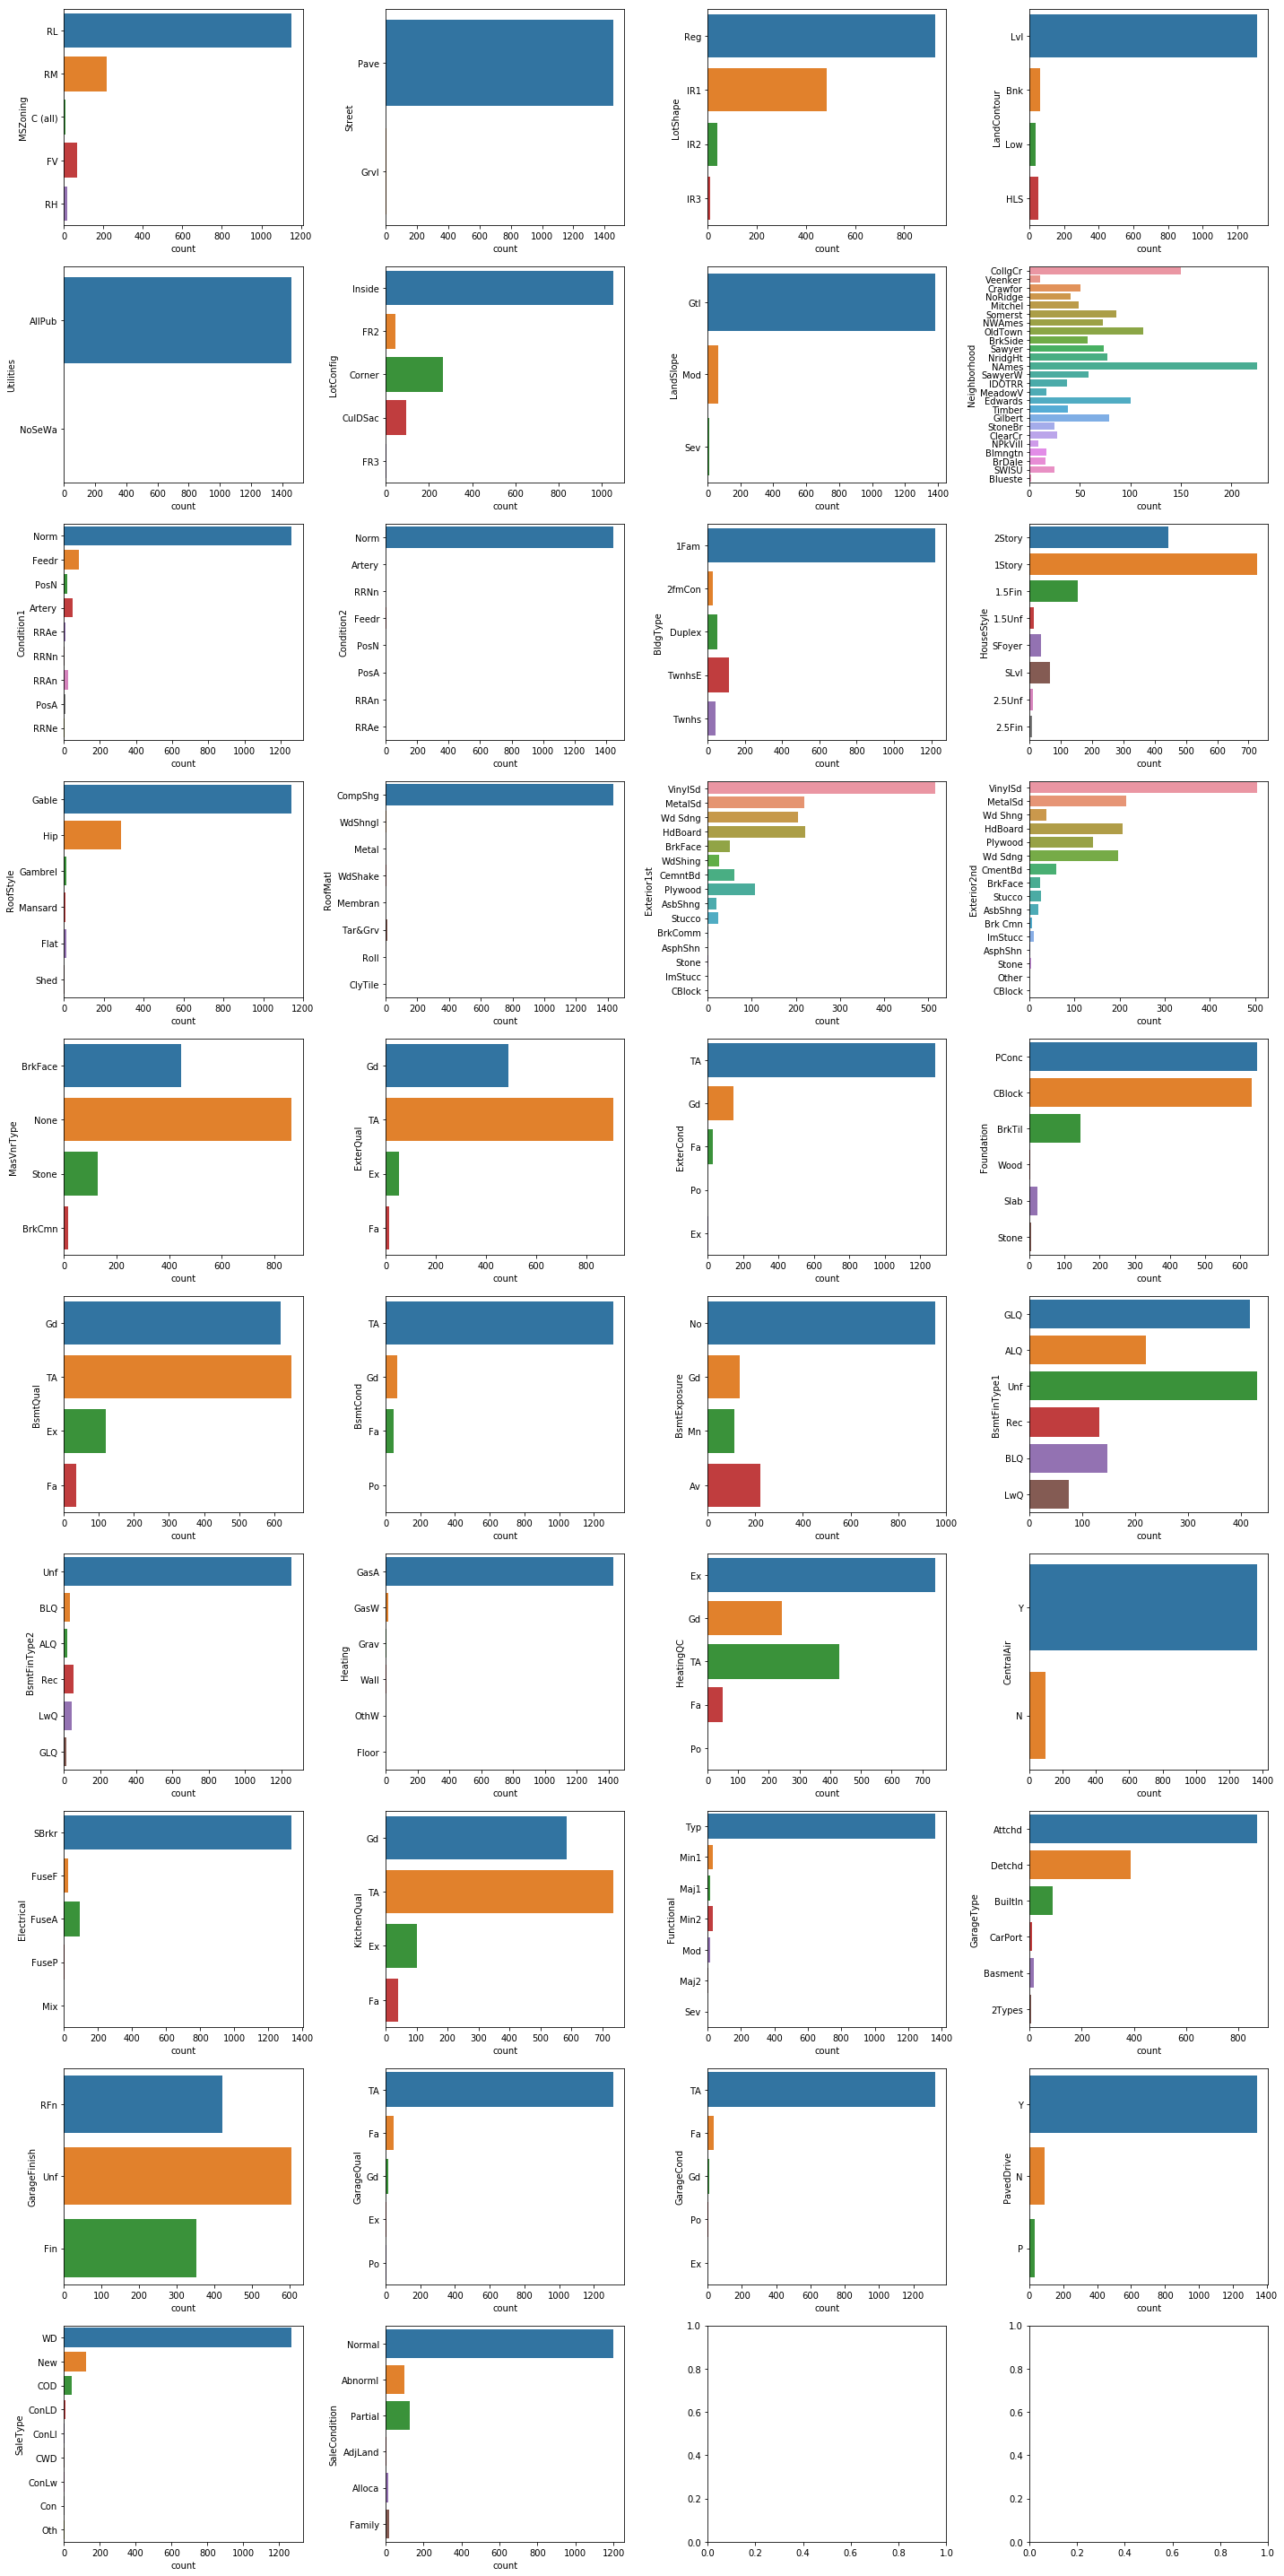

In [168]:
#plot categorical data in bar plot
fig , axes = plt.subplots(10,4, figsize = (20,40))
axes = axes.flatten()
object_bol = df_train.dtypes == 'object'

for ax, catplot in zip(axes, df_train.dtypes[object_bol].index):
    sns.countplot(y=catplot, data=df_train, ax=ax)

plt.tight_layout()  
plt.show()

In [169]:
print(df_train.dtypes[object_bol].index)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [170]:
selected_features = ['MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','HouseStyle','BldgType'
                    ,'Exterior1st','ExterQual','Foundation','BsmtQual','BsmtFinType1','HeatingQC','CentralAir','KitchenQual'
                    ,'GarageType']
unselected_features = ['Street','Utilities','LandSlope','Condition2','RoofStyle', 'RoofMatl',
       'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
       'Heating', 'Electrical','Functional', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']
df_train[selected_features].isnull().sum()

df_train = df_train.drop(unselected_features, axis=1)
df_test = df_test.drop(unselected_features, axis=1)


In [171]:
df_train['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [172]:
df_test['GarageType'].describe()

count       1383
unique         6
top       Attchd
freq         853
Name: GarageType, dtype: object

In [173]:
df_train['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [174]:
df_test['BsmtQual'].describe()

count     1415
unique       4
top         TA
freq       634
Name: BsmtQual, dtype: object

In [175]:
# fill missing categorical data with mode
df_train['GarageType'] = df_train['GarageType'].fillna("Attchd")
df_test['GarageType'] = df_test['GarageType'].fillna("Attchd")

In [176]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna("TA")
df_test['BsmtQual'] = df_test['BsmtQual'].fillna("TA")

In [177]:
df_train['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [178]:
df_test['BsmtFinType1'].describe()

count     1417
unique       6
top        GLQ
freq       431
Name: BsmtFinType1, dtype: object

In [179]:
from scipy.stats import mode
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna("Unf")
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna("GLQ")

In [180]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(0)

In [181]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         4
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      1
MasVnrArea      15
ExterQual        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
BsmtFinSF1       1
BsmtUnfSF        1
TotalBsmtSF      1
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageCars       1
GarageArea       1
OpenPorchSF      0
MoSold           0
YrSold           0
dtype: int64

In [182]:
df_train['BsmtTotalBath'] = df_train['BsmtFullBath'] + df_train['BsmtHalfBath']
df_test['BsmtTotalBath'] = df_test['BsmtFullBath'] + df_test['BsmtHalfBath']

In [183]:
df_train['TotalBath'] = df_train['FullBath'] + df_train['HalfBath']
df_test['TotalBath'] = df_test['FullBath'] + df_test['HalfBath']

In [184]:
df_train.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice,BsmtTotalBath,TotalBath
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.140759,-0.238518,-0.251758,0.307886,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.006100,-0.013585,-0.021407,-0.084284,0.002331,0.203398
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.084774,0.001205,-0.014261,0.263843,0.173808,0.096360
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,0.295493,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.308819,0.070815,-0.027347,0.790982,0.089309,0.554555
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,-0.136841,-0.171098,-0.144203,0.028942,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.032589,-0.003511,0.043950,-0.077856,-0.000705,-0.172989
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,0.010308,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.188686,0.012398,-0.013618,0.522897,0.163954,0.478016
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.226298,0.021490,0.035743,0.507101,0.109720,0.420235
MasVnrArea,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,0.174561,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.133766,0.364204,0.373066,0.125703,-0.005965,-0.008201,0.477493,0.094072,0.319072
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.111761,-0.015727,0.014359,0.386420,0.655883,0.043267
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.042720,0.214175,0.183303,0.129005,0.034888,-0.041258,0.214479,-0.450265,0.174189
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.176359,0.434585,0.486665,0.247264,0.013196,-0.014969,0.613581,0.296210,0.193469


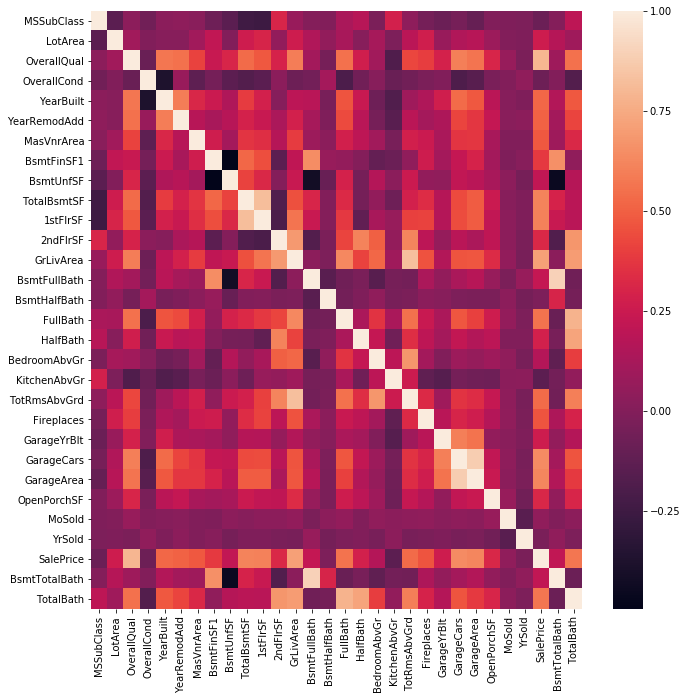

In [185]:
fig, ax = plt.subplots(figsize = (11,11))
sns.heatmap(df_train.corr() , ax=ax)

In [186]:
# removing 1 variable from 2 highly correlated vairables
df_train = df_train.drop(['TotRmsAbvGrd','GarageArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)
df_test = df_test.drop(['TotRmsAbvGrd','GarageArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)

In [187]:
df_train.corr().sort_values(by = 'SalePrice', ascending = False)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,OpenPorchSF,MoSold,YrSold,SalePrice,BsmtTotalBath,TotalBath
SalePrice,-0.084284,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,0.214479,0.613581,0.605852,0.319334,0.708624,0.168213,-0.135907,0.466929,0.261366,0.640409,0.315856,0.046432,-0.028923,1.000000,0.211520,0.568267
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,0.295493,0.593007,0.101676,-0.183882,0.396765,0.288998,0.600671,0.308819,0.070815,-0.027347,0.790982,0.089309,0.554555
GrLivArea,0.074853,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.521270,0.100063,0.461679,0.162543,0.467247,0.330224,0.050240,-0.036526,0.708624,0.025196,0.699614
GarageCars,-0.040110,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,0.214175,0.434585,0.439317,0.183926,0.467247,0.086106,-0.050634,0.300789,0.598005,1.000000,0.213569,0.040522,-0.039117,0.640409,0.117893,0.464135
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.050450,-0.068901,0.339519,0.176359,0.434585,0.247264,0.013196,-0.014969,0.613581,0.296210,0.193469
1stFlrSF,-0.251758,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.127401,0.068101,0.410531,0.166642,0.439317,0.211671,0.031372,-0.013604,0.605852,0.236781,0.187927
TotalBath,0.203398,0.096360,0.554555,-0.172989,0.478016,0.420235,0.319072,0.043267,0.174189,0.193469,0.187927,0.677711,0.699614,0.395113,0.049068,0.297691,0.169381,0.464135,0.306519,0.032995,-0.020126,0.568267,-0.082187,1.000000
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,0.010308,0.199010,-0.070651,-0.174800,0.147716,0.272029,0.537850,0.188686,0.012398,-0.013618,0.522897,0.163954,0.478016
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,-0.040581,-0.149598,0.112581,0.146357,0.420622,0.226298,0.021490,0.035743,0.507101,0.109720,0.420235
MasVnrArea,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,0.174561,0.390857,0.102821,-0.037610,0.249070,0.133766,0.364204,0.125703,-0.005965,-0.008201,0.477493,0.094072,0.319072


In [188]:
df_train = df_train.drop(['MasVnrArea','Fireplaces','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotArea','GarageYrBlt','BsmtUnfSF'
                         ,'BsmtTotalBath','BedroomAbvGr','MoSold'], axis=1)
df_test = df_test.drop(['MasVnrArea','Fireplaces','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotArea','GarageYrBlt','BsmtUnfSF'
                         ,'BsmtTotalBath','BedroomAbvGr','MoSold'], axis=1)

In [189]:
#encode categorical features using get dummies
# standardize numerical data
# feature engineering
# adding 2 or more variables
# apply linear, ridge, lasso, xgboost, ensemble


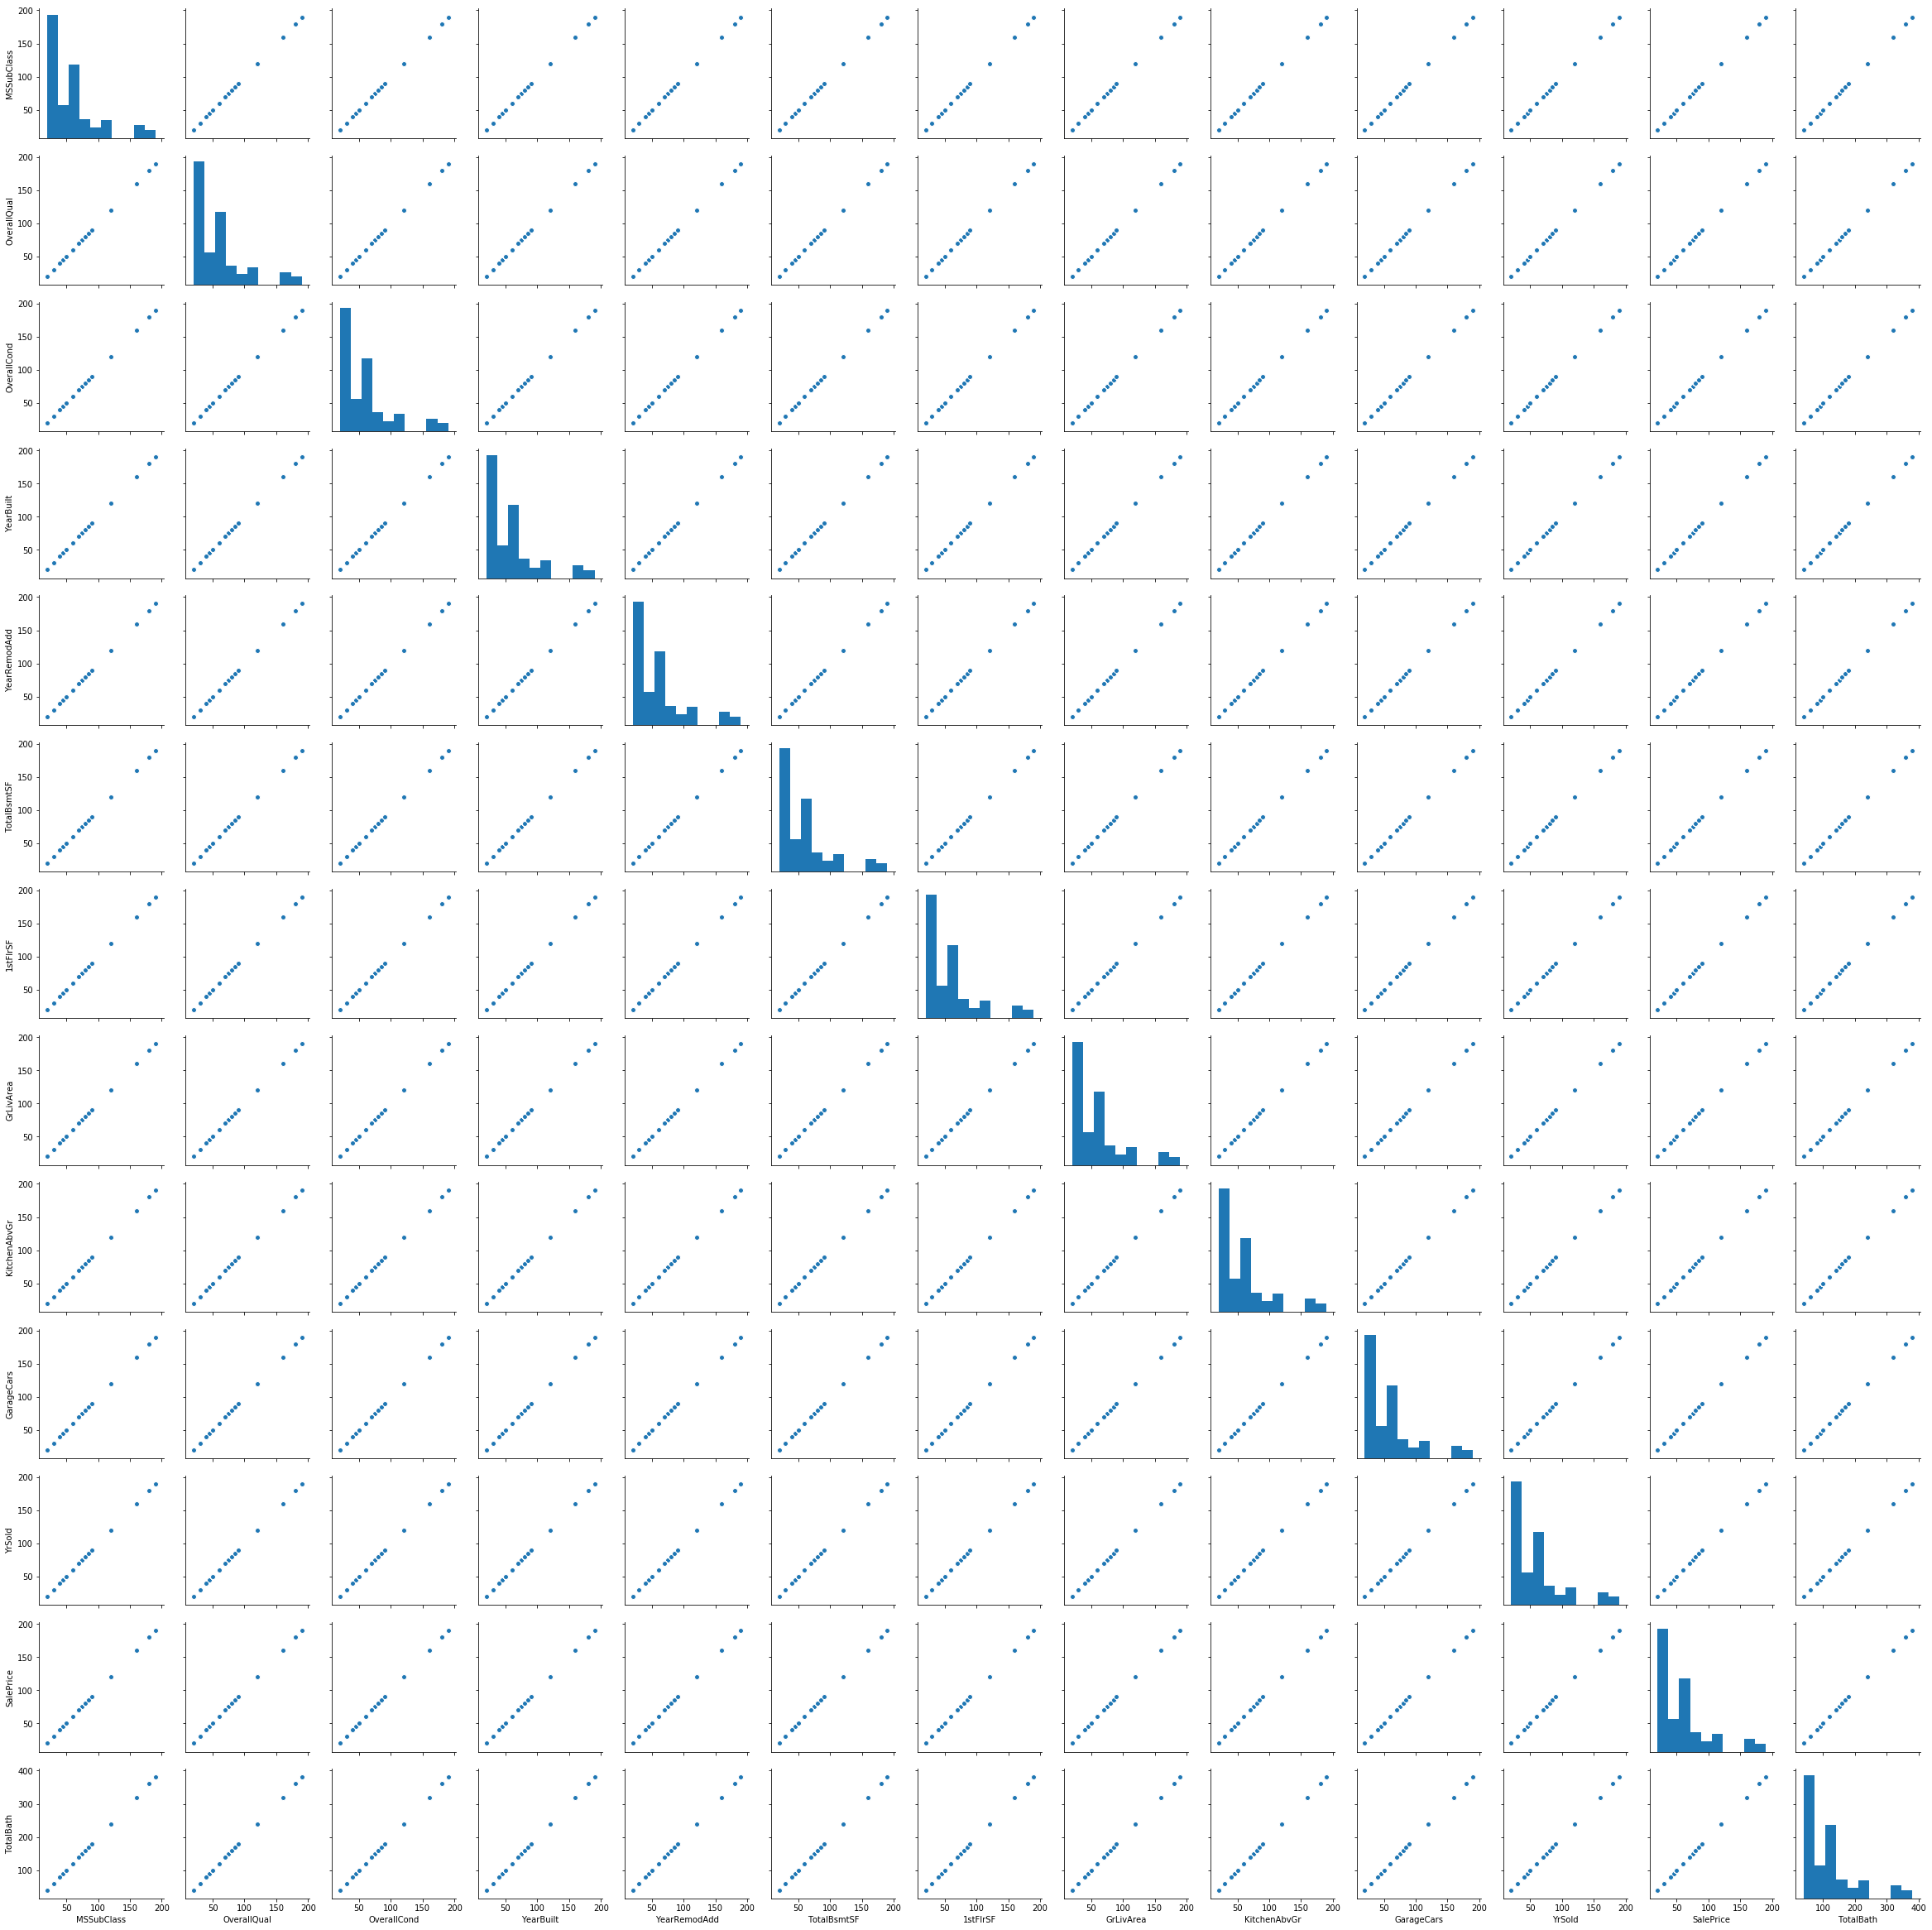

In [37]:
sns.pairplot(df_train)

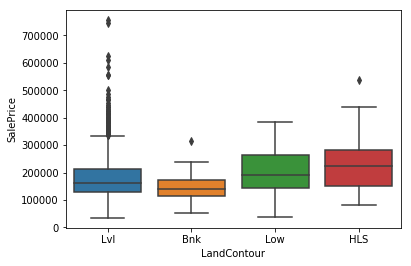

In [190]:
sns.boxplot(x = df_train["LandContour"],y=df_train["SalePrice"])

In [191]:
df_train.select_dtypes(include = ['object']).head(2)

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,GarageType
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,VinylSd,Gd,PConc,Gd,GLQ,Ex,Y,Gd,Attchd
1,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,MetalSd,TA,CBlock,Gd,ALQ,Ex,Y,TA,Attchd


In [192]:
import statsmodels.formula.api as smf
model = smf.ols(formula='SalePrice ~ GarageType', data=df_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     59.31
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           2.58e-56
Time:                        06:06:23   Log-Likelihood:                -18409.
No. Observations:                1460   AIC:                         3.683e+04
Df Residuals:                    1454   BIC:                         3.686e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.513e+

In [193]:
df_train = df_train.drop(['MSZoning','LotShape','LandContour','LotConfig','Condition1','BldgType','HouseStyle',
                         'Exterior1st'], axis=1)
df_test = df_test.drop(['MSZoning','LotShape','LandContour','LotConfig','Condition1','BldgType','HouseStyle',
                         'Exterior1st'], axis=1)

In [194]:
df_train = pd.get_dummies(df_train, columns = ['Neighborhood','ExterQual','Foundation','BsmtQual','BsmtFinType1',
                                              'HeatingQC','CentralAir','KitchenQual','GarageType'])
df_test = pd.get_dummies(df_test, columns = ['Neighborhood','ExterQual','Foundation','BsmtQual','BsmtFinType1',
                                              'HeatingQC','CentralAir','KitchenQual','GarageType'])

df_train.head()

In [195]:
df_test.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenAbvGr,GarageCars,YrSold,TotalBath,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,20,5,6,1961,1961,882.0,896,896,1,1.0,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0
1,20,6,6,1958,1958,1329.0,1329,1329,1,1.0,2010,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
2,60,5,5,1997,1998,928.0,928,1629,1,2.0,2010,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,60,6,6,1998,1998,926.0,926,1604,1,2.0,2010,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,120,8,5,1992,1992,1280.0,1280,1280,1,2.0,2010,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [196]:
corr1 = df_train.corr()['SalePrice']

corr = corr1[np.abs(corr1) > 0.4]
corr

OverallQual             0.790982
YearBuilt               0.522897
YearRemodAdd            0.507101
TotalBsmtSF             0.613581
1stFlrSF                0.605852
GrLivArea               0.708624
GarageCars              0.640409
SalePrice               1.000000
TotalBath               0.568267
Neighborhood_NridgHt    0.402149
ExterQual_Ex            0.451164
ExterQual_Gd            0.452466
ExterQual_TA           -0.589044
Foundation_PConc        0.497734
BsmtQual_Ex             0.553105
BsmtQual_TA            -0.498545
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
KitchenQual_Ex          0.504094
KitchenQual_TA         -0.519298
Name: SalePrice, dtype: float64

# applying models
- Linear
- Lasso
- Ridge
- RandomForest
- Xgboost
- Ensemble

In [197]:
# Corss validation score

X_train = df_train.drop('SalePrice', axis=1)
y_train = np.log(df_train['SalePrice'])
test = df_test

lr = LinearRegression()
lr.fit(X_train, y_train)
#training score
lr_score = cross_val_score(lr, X_train, y_train, cv = 5,scoring = "r2" ).mean()
print("R2 score of LinearRegression :",lr_score)
linearmse = np.sqrt(-cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of LinearRegression:",linearmse)

R2 score of LinearRegression : 0.866790406909
Root mean square of LinearRegression: 0.144541868711


In [198]:
ridge = Ridge(fit_intercept=True, normalize=True, alpha = 0.01) 
ridge.fit(X_train,y_train)
#training score
ridge_score = cross_val_score(ridge, X_train, y_train, cv = 5,scoring = "r2" ).mean()
print("R2 score of Ridge :",ridge_score)
ridgemse = np.sqrt(-cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of Ridge:",ridgemse)


R2 score of Ridge : 0.867399257168
Root mean square of Ridge: 0.144232154635


In [199]:
coeff = ridge.coef_

In [200]:
sorted(dict(zip(X.columns,coeff)).items(), key = lambda x : x[1])

[('Neighborhood_MeadowV', -0.2068227748366564),
 ('Neighborhood_BrDale', -0.18705294881526077),
 ('Neighborhood_Blueste', -0.15441049913279359),
 ('HeatingQC_Po', -0.14956280797802771),
 ('Neighborhood_IDOTRR', -0.14429782732971314),
 ('Foundation_Wood', -0.11697121262084542),
 ('Neighborhood_NPkVill', -0.11288016565698866),
 ('Neighborhood_OldTown', -0.098462094955892476),
 ('GarageType_2Types', -0.088676158554226128),
 ('GarageType_CarPort', -0.088571432923931451),
 ('Neighborhood_Edwards', -0.082036300226066172),
 ('BsmtFinType1_Unf', -0.054434597375352958),
 ('BsmtQual_Fa', -0.044846352642568844),
 ('Neighborhood_NWAmes', -0.041933322279531345),
 ('Foundation_Slab', -0.040985229283407483),
 ('CentralAir_N', -0.04020097181163091),
 ('KitchenQual_Fa', -0.039434512623992668),
 ('Foundation_BrkTil', -0.034610389008101469),
 ('ExterQual_Fa', -0.034288317052828747),
 ('Neighborhood_Sawyer', -0.031968966773837502),
 ('KitchenAbvGr', -0.031600868666707783),
 ('ExterQual_Ex', -0.02641397659

In [201]:
lasso = LassoCV()
lasso.fit(X_train,y_train)

#training score
lasso_score = cross_val_score(lasso, X_train, y_train, cv = 5,scoring = "r2" ).mean()
print("R2 score of lasso :",lasso_score)
lassomse = np.sqrt(-cross_val_score(lasso, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of lasso:",lassomse)

R2 score of lasso : 0.747153754503
Root mean square of lasso: 0.197488947324


In [202]:
lassoreg = Lasso(alpha=0.01)
lassoreg.fit(X_train,y_train)

#training score
lassoreg_score = cross_val_score(lassoreg, X_train, y_train, cv = 5,scoring = "r2" ).mean()
print("R2 score of lassoregression :",lassoreg_score)
lassoregmse = np.sqrt(-cross_val_score(lassoreg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of lassoregression:",lassoregmse)

R2 score of lassoregression : 0.832706524811
Root mean square of lassoregression: 0.160716671549


In [203]:
coeff = lasso.coef_

In [204]:
sorted(dict(zip(X.columns,coeff)).items(), key = lambda x : x[1])

[('MSSubClass', -0.00065800581446434029),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('KitchenAbvGr', -0.0),
 ('GarageCars', 0.0),
 ('YrSold', -0.0),
 ('TotalBath', 0.0),
 ('Neighborhood_Blmngtn', -0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_BrkSide', 0.0),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_Edwards', -0.0),
 ('Neighborhood_Gilbert', -0.0),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_MeadowV', -0.0),
 ('Neighborhood_Mitchel', -0.0),
 ('Neighborhood_NAmes', 0.0),
 ('Neighborhood_NPkVill', 0.0),
 ('Neighborhood_NWAmes', -0.0),
 ('Neighborhood_NoRidge', 0.0),
 ('Neighborhood_NridgHt', 0.0),
 ('Neighborhood_OldTown', -0.0),
 ('Neighborhood_SWISU', -0.0),
 ('Neighborhood_Sawyer', -0.0),
 ('Neighborhood_SawyerW', -0.0),
 ('Neighborhood_Somerst', 0.0),
 ('Neighborhood_StoneBr', 0.0),
 ('Neighborhood_Timber', 0.0),
 ('Neighborhood_Veenker', 0.0),
 ('ExterQual_Ex', 0.

In [205]:
# #RandomForestRegrssor
# rfreg = RandomForestRegressor()
# # list of values to try for n_estimators
# estimator_range = range(10, 210, 10)

# # list to store the average RMSE for each value of n_estimators
# RMSE_scores = []

# # use 5-fold cross-validation with each value of n_estimators. Will take a while.

# for estimator in estimator_range:
#     rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
#     MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
#     RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

KeyboardInterrupt: 

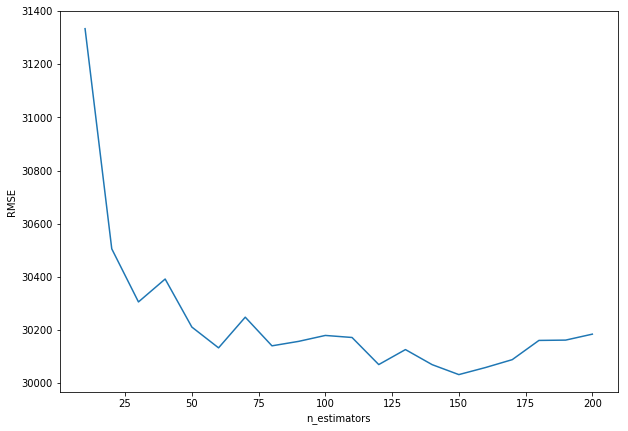

In [89]:
# # plot n_estimators (x-axis) versus RMSE (y-axis)
# plt.figure(figsize=(10, 7))
# plt.plot(estimator_range, RMSE_scores)
# plt.xlabel('n_estimators')
# plt.ylabel('RMSE');

In [91]:
# # max_features=6 is best and n_estimators=150 is sufficiently large
# rfreg = RandomForestRegressor(n_estimators=150, 
#                               max_features=6,
#                               oob_score=True,
#                               random_state=1)
# rfreg.fit(X_train, y_train)




RandomForest mean squared error :  1113788005.3
RF mean squared log error :  0.0216903041116


In [92]:
# print(rfreg.oob_score_)

0.837668076012


In [206]:
### Gradient Boosting Regressor ##
clf_xgb = xgb(learning_rate=0.01, n_estimators=500, max_depth=3, subsample= 0.5)
clf_xgb.fit(X_train, y_train)
#training score
xgb_score = cross_val_score(clf_xgb, X_train, y_train, cv = 5,scoring = "r2" ).mean()
print("R2 score of lasso :",xgb_score)
xgbmse = np.sqrt(-cross_val_score(clf_xgb, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of lasso:",xgbmse)

R2 score of lasso : 0.885797813658
Root mean square of lasso: 0.134978039195


In [210]:
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())

In [212]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean())

In [213]:
test = df_test

# xgb gave the highest score and is chosen for prediction on the test set. 

In [214]:
predict = pd.DataFrame(np.exp(clf_xgb.predict(test)), columns= ['SalePrice'])    # Predictions on the test set
submission = pd.concat([test_id, predict],axis =1)
submission.to_csv("submission.csv",header = True, index =False)